# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Null values in Data

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


### Duplicate Values in Data

In [9]:
df.duplicated().sum()

0

### Removing null values

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [11]:
df.drop('Cabin', axis=1,inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


## Percentage of Women survived

In [14]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7403846153846154


## Percentage of Men Survived

In [15]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Visualization

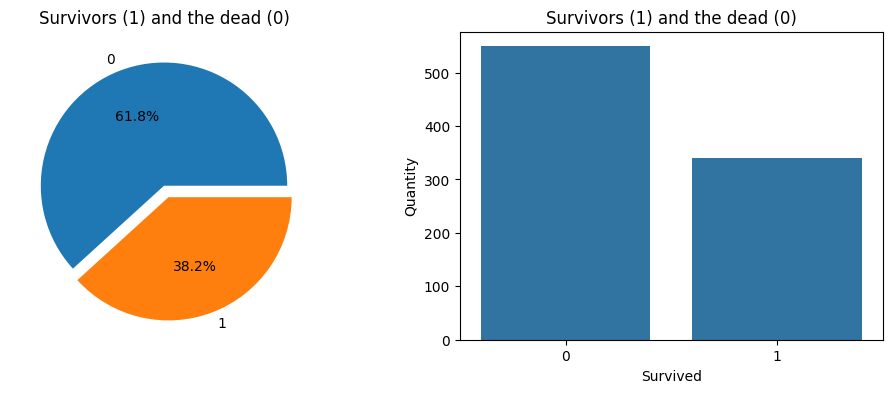

In [16]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df['Survived'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show()

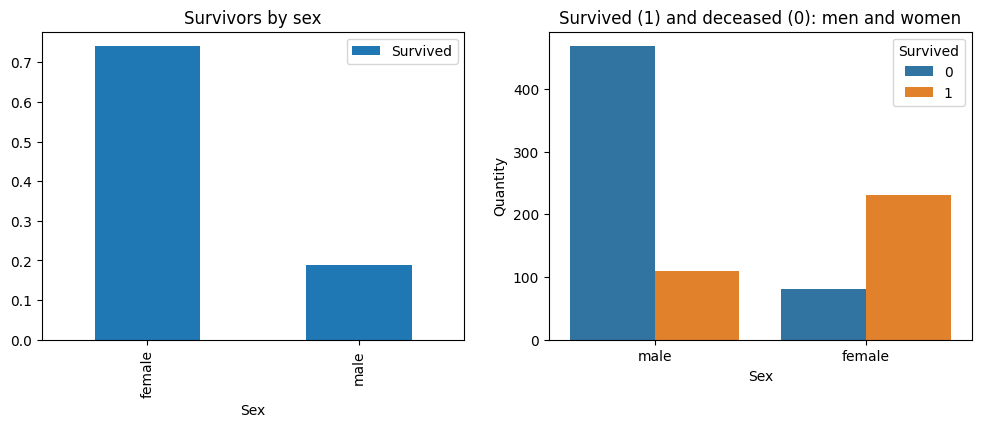

In [17]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show()

In [18]:
df.describe(include = 'all').round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.0,889.00,889.00,889,889,889.00,889.00,889.00,889,889.00,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.0,0.38,2.31,NaN,NaN,29.65,0.52,0.38,NaN,32.10,NaN
std,257.0,0.49,0.83,NaN,NaN,12.97,1.10,0.81,NaN,49.70,NaN
min,1.0,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN
25%,224.0,0.00,2.00,NaN,NaN,22.00,0.00,0.00,NaN,7.90,NaN
50%,446.0,0.00,3.00,NaN,NaN,29.70,0.00,0.00,NaN,14.45,NaN
75%,668.0,1.00,3.00,NaN,NaN,35.00,1.00,0.00,NaN,31.00,NaN


In [19]:
train = df.drop(['Ticket'], axis=1)

In [20]:
df["PassengerId"].count()

889

In [21]:
df["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [22]:
df["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [23]:
pd.DataFrame({
	'Frequency':  df['Sex'].value_counts(),
	'Percentage': df['Sex'].value_counts(normalize=True),
})

,Frequency,Percentage
Sex,,
male,577,0.649044
female,312,0.350956


In [24]:
pd.DataFrame({
	'Frequency':  df['Survived'].value_counts(),
	'Percentage': df['Survived'].value_counts(normalize=True),
})

,Frequency,Percentage
Survived,,
0,549,0.617548
1,340,0.382452


In [25]:
pd.DataFrame({
	'Frequency':  df['Pclass'].value_counts(),
	'Percentage': df['Pclass'].value_counts(normalize=True),
}).sort_values(by='Pclass')

,Frequency,Percentage
Pclass,,
1,214,0.240720
2,184,0.206974
3,491,0.552306


In [26]:
pd.DataFrame({
	'Frequency':  df['Sex'].value_counts(),
	'Percentage': df['Sex'].value_counts(normalize=True),
})

,Frequency,Percentage
Sex,,
male,577,0.649044
female,312,0.350956


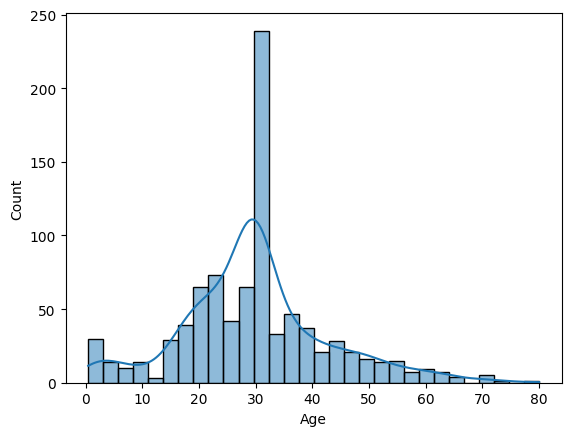

In [27]:
sns.histplot(df, x='Age', kde=True)
plt.show()

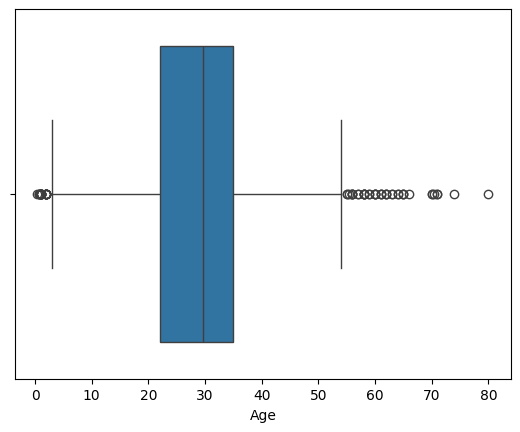

In [28]:
sns.boxplot(df, x='Age')
plt.show()

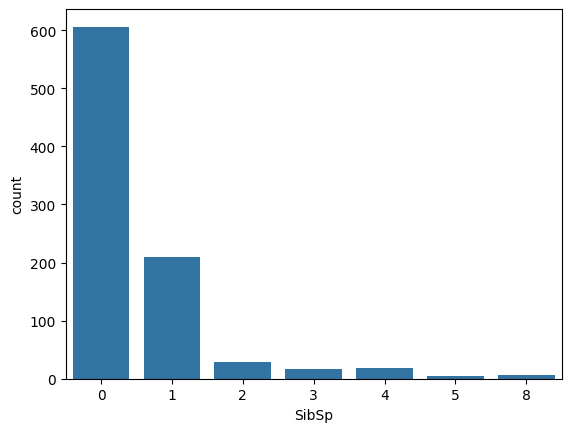

In [29]:
sns.countplot(df, x='SibSp')
plt.show()

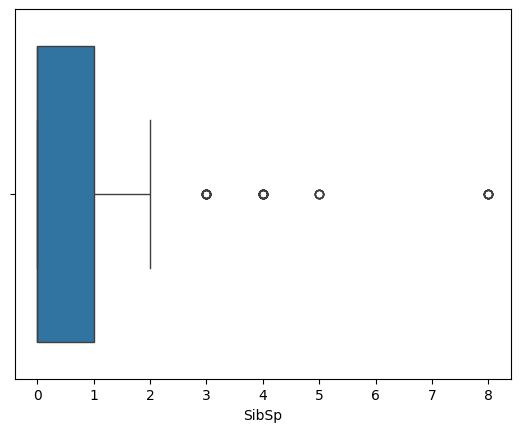

In [30]:
sns.boxplot(df, x='SibSp')
plt.show()

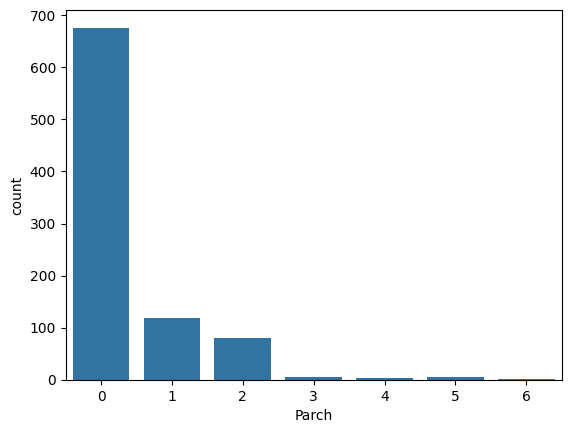

In [31]:
sns.countplot(df, x='Parch')
plt.show()

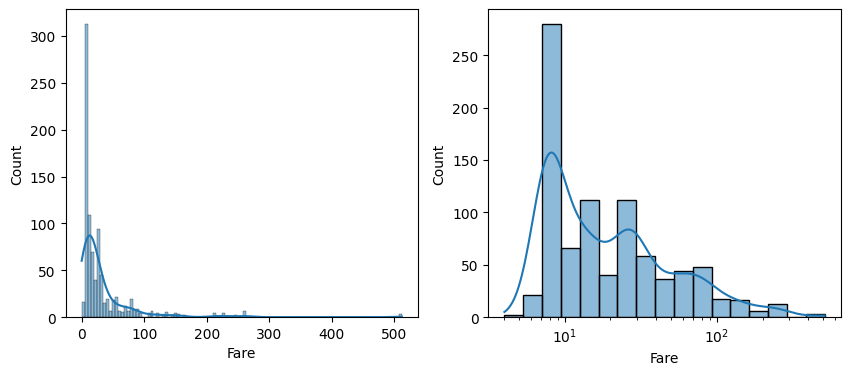

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.histplot(df, x='Fare', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df[df['Fare']>0], x='Fare', kde=True, log_scale=10)
plt.show()

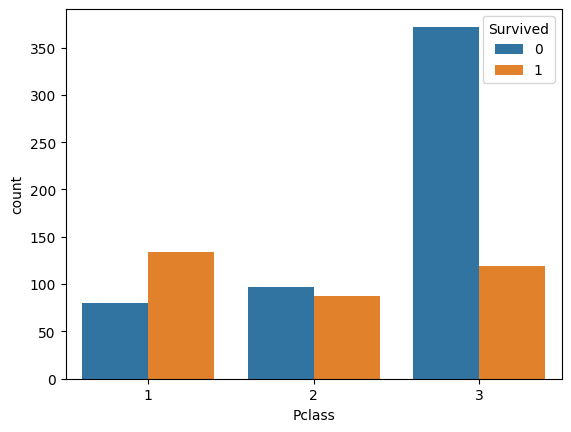

In [33]:
sns.countplot(df, x='Pclass', hue='Survived')
plt.show()

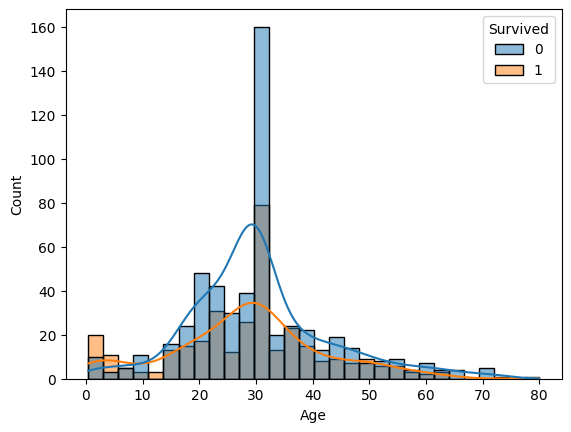

In [34]:
sns.histplot(df, x='Age', hue='Survived', kde=True)
plt.show()

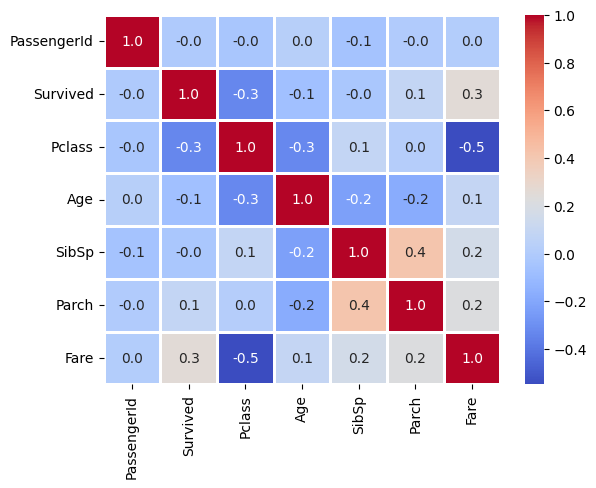

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2)
plt.show()

In [36]:
def preprocess(df):
	encoder= LabelEncoder()
	df['Sex']= encoder.fit_transform(df['Sex'])
	df.drop(inplace=True, columns=['Fare'])
	del(encoder)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

preprocess(df_train)
X_train= df_train.drop(['Survived'], axis=1)
y_train= df_train.loc[:, 'Survived']

preprocess(df_test)
X_test= df_test.drop(['Survived'], axis=1)
y_test= df_test.loc[:, 'Survived']

print(f'Train Size: {df_train.shape}, Test Size: {df_test.shape}')

Train Size: (711, 10), Test Size: (178, 10)


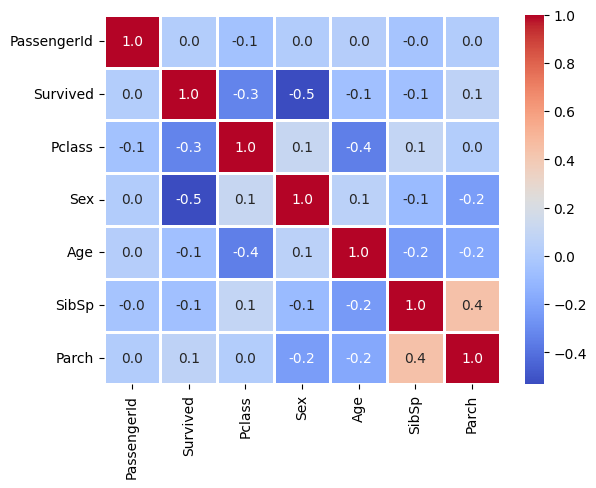

In [38]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2)
plt.show()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074673 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.327954  0.081656  0.016824   
Age             0.030300 -0.074673 -0.327954  1.000000 -0.231875 -0.178232   
SibSp          -0.057686 -0.034040  0.081656 -0.231875  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178232  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088604  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.088604  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


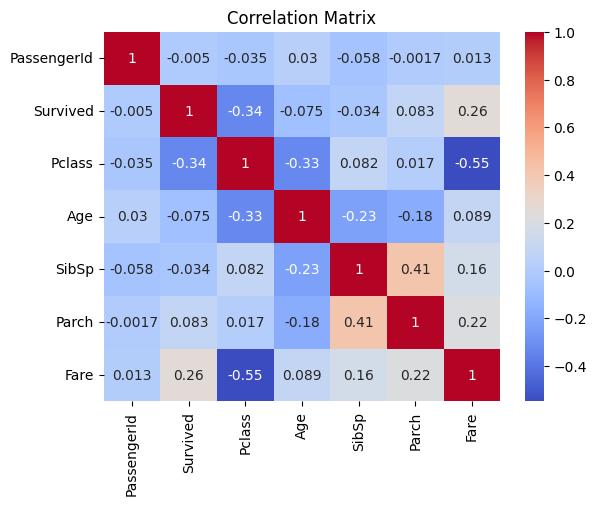

In [39]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

<Axes: >

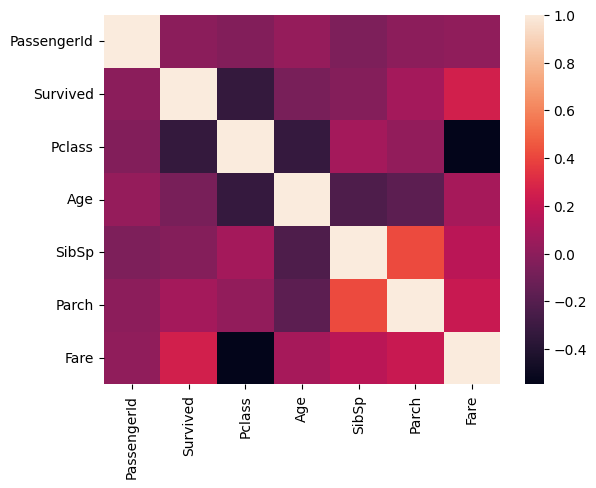

In [40]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix)

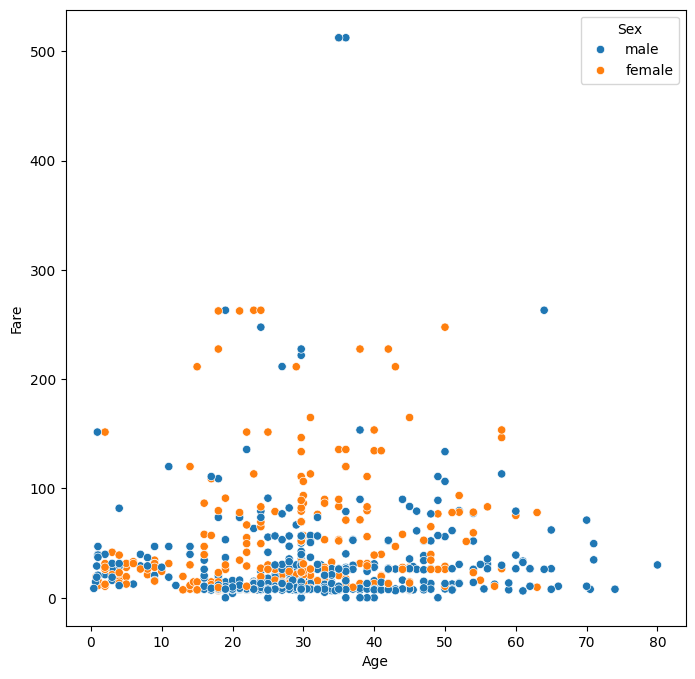

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.show()


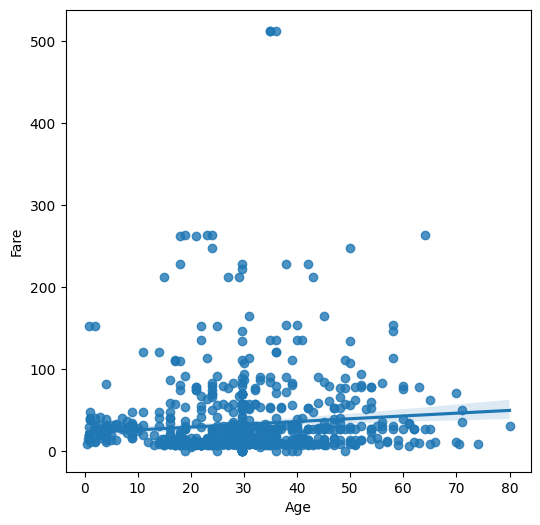

In [42]:
plt.subplots(figsize=(6, 6))
sns.regplot(x="Age", y="Fare", data=df)
plt.show()

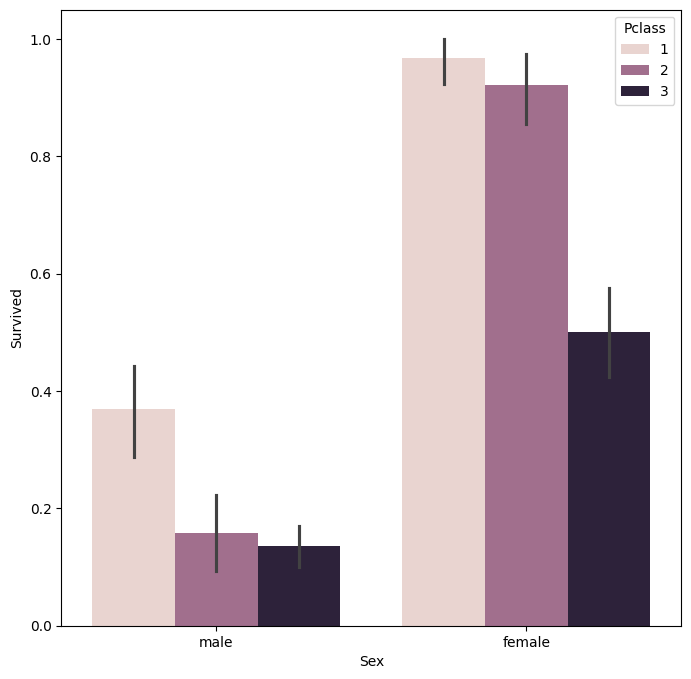

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()